In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [0]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
titanic=pd.read_csv('train.csv')
titanic_test_submission=pd.read_csv('test.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [0]:
titanic_test_submission=pd.read_csv('test.csv')
titanic_test_submission.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [0]:
#get the info of the titanic data 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
#titanic embarked value type and number of type
pd.value_counts(titanic['Embarked'].values.flatten())

S    644
C    168
Q     77
dtype: int64

In [0]:
#get the number data info
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


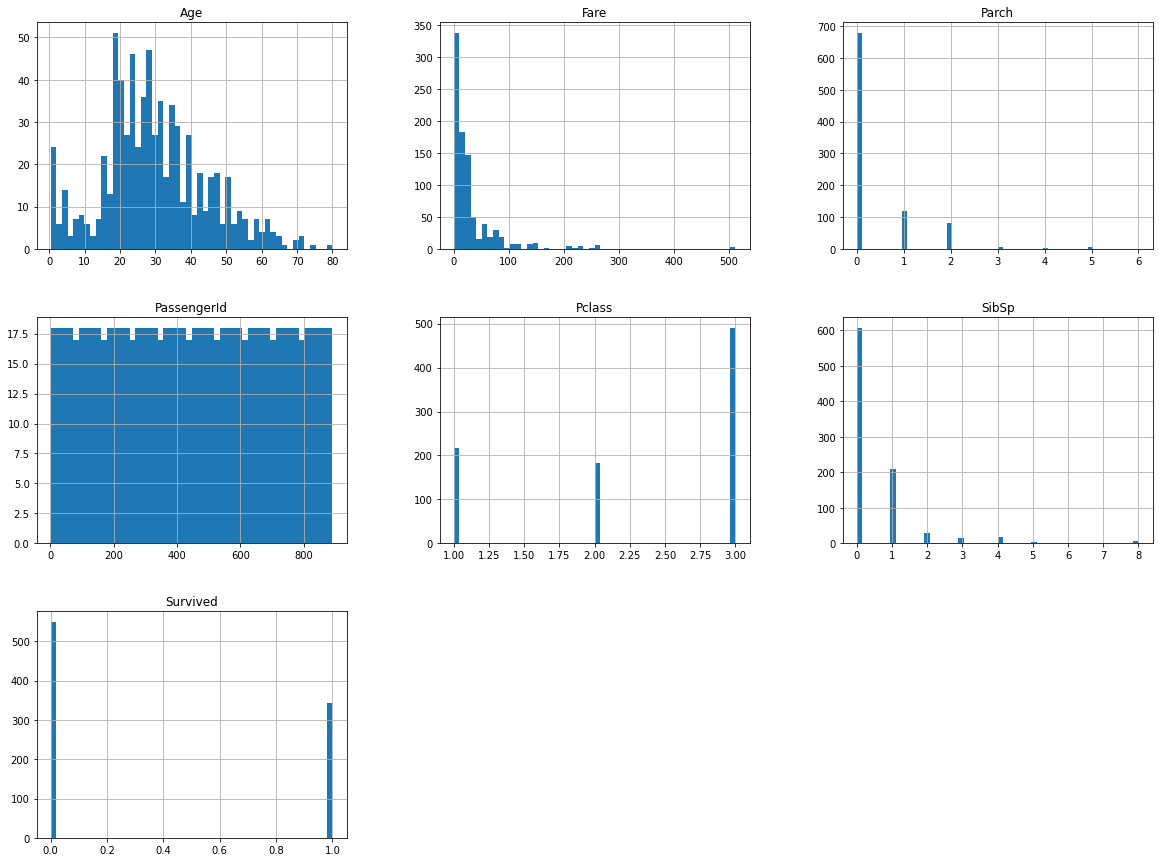

In [0]:
#get the overall idea from the data
titanic.hist(bins=50, figsize=(20,15))
plt.show()


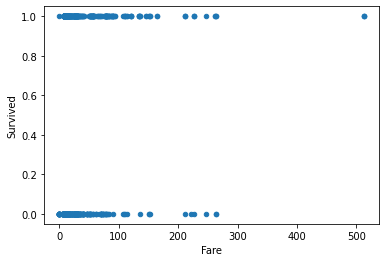

In [0]:
titanic.plot(kind="scatter", x="Fare", y="Survived")

In [0]:
#corelation of the data 
corr_matrix = titanic.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [0]:
#StratifiedShuffleSplit split the train test data
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic, titanic["Survived"]):
  strat_train_set = titanic.loc[train_index]
  strat_test_set = titanic.loc[test_index]


In [0]:
#consider the data we will consider for our model
titanic_test_temp=strat_train_set.copy()
titanic_train = strat_train_set.drop(["Survived",'PassengerId','Ticket','Name','Cabin'], axis=1)
titanic_train_labels = strat_train_set["Survived"].copy()
titanic_train.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,male,NaN,0,0,56.4958,S
481,2,male,NaN,0,0,0.0000,S
527,1,male,NaN,0,0,221.7792,S
855,3,female,18.0,0,1,9.3500,S


In [0]:
#Again get the info fom the data idea about missing value
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       575 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [0]:
#get the median of the "age" column so that we can replace it with null vlaue
median= titanic_train["Age"].median()
median

28.5

In [0]:
#fill the null value with median and the max
titanic_train["Age"]=titanic_train["Age"].fillna(median)
titanic_train["Embarked"]=titanic_train["Embarked"].fillna('S')

In [0]:
#check wheter we are right
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [0]:
pd.value_counts(titanic_train['SibSp'].values.flatten())

0    494
1    164
2     21
4     15
3     10
8      5
5      3
dtype: int64

In [0]:
pd.value_counts(titanic_train['Parch'].values.flatten())

0    542
1     94
2     61
5      5
3      5
4      4
6      1
dtype: int64

In [0]:
#text data into numarics
titanic_train_emb=titanic_train["Embarked"]
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
titanic_train_cat_1hot = encoder.fit_transform(titanic_train_emb)


In [0]:
titanic_train_cat_1hot

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [0]:
#text to numaric
titanic_train_sex=titanic_train["Sex"]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic_train_sex_encoded = encoder.fit_transform(titanic_train_sex)
titanic_train_sex_encoded.shape

(712,)

In [0]:
print(titanic_train_sex_encoded.shape)
print(titanic_train_cat_1hot.shape)
print(titanic_train.shape)

(712,)
(712, 3)
(712, 7)


In [0]:
titanic_train_temp=titanic_train.drop(["Sex",'Embarked'], axis=1)
titanic_train_temp["Sex"]=titanic_train_sex_encoded
titanic_train_temp.head(3)


,Pclass,Age,SibSp,Parch,Fare,Sex
692,3,28.5,0,0,56.4958,1
481,2,28.5,0,0,0.0000,1
527,1,28.5,0,0,221.7792,1


In [0]:
from sklearn.pipeline import FeatureUnion
num_attribs = list(titanic_train_temp)
cat_attribs = ["Embarked"]
"""
num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attribs,1))
 ])
cat_pipeline = Pipeline([
 ('selector', DataFrameSelector(cat_attribs))
 ])
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])
 """

'\nnum_pipeline = Pipeline([\n (\'selector\', DataFrameSelector(num_attribs,1))\n ])\ncat_pipeline = Pipeline([\n (\'selector\', DataFrameSelector(cat_attribs))\n ])\nfull_pipeline = FeatureUnion(transformer_list=[\n ("num_pipeline", num_pipeline),\n ("cat_pipeline", cat_pipeline),\n ])\n '

In [0]:
titanic_train_temp[num_attribs].values

array([[  3.    ,  28.5   ,   0.    ,   0.    ,  56.4958,   1.    ],
       [  2.    ,  28.5   ,   0.    ,   0.    ,   0.    ,   1.    ],
       [  1.    ,  28.5   ,   0.    ,   0.    , 221.7792,   1.    ],
       ...,
       [  3.    ,  48.    ,   1.    ,   3.    ,  34.375 ,   0.    ],
       [  1.    ,  47.    ,   0.    ,   0.    ,  38.5   ,   1.    ],
       [  1.    ,  28.5   ,   0.    ,   0.    ,  26.55  ,   1.    ]])

In [0]:
titanic_prepared=np.append(titanic_train_temp[num_attribs].values,titanic_train_cat_1hot,axis=1)
print(titanic_prepared.shape)
print(titanic_train_labels.shape)
X_train=titanic_prepared
y_train=titanic_train_labels.values

(712, 9)
(712,)


In [0]:
#Naive Bays
from sklearn.naive_bayes import GaussianNB
some_example= X_train[150:160]
acutal_val=y_train[150:160]
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred=gnb.predict(some_example)
print(pred)
print(acutal_val)

[0 0 1 1 0 1 0 0 1 1]
[1 0 1 1 0 1 0 0 0 1]


In [0]:
#Decision tree
from sklearn import tree
some_example= X_train[150:160]
acutal_val=y_train[150:160]
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred=clf.predict(some_example)
print(pred)
print(acutal_val)

[0 0 0 1 1 0 1 1 0 0]
[0 0 0 1 1 0 1 1 0 0]


In [0]:
#support vector machine 
from sklearn import svm
some_example= X_train[150:160]
acutal_val=y_train[150:160]
svmc=svm.SVC()
svmc.fit(X_train, y_train)
pred=svmc.predict(some_example)
print(pred)
print(acutal_val)

[0 0 0 1 0 0 0 1 0 0]
[0 0 0 1 1 0 1 1 0 0]


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer

num_attribs = list(titanic_train_temp)
cat_attribs = ["Embarked"]
titanic_test=strat_test_set[num_attribs]


In [0]:
titanic_test['Age']=titanic_test['Age'].fillna(median)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
titanic_test_sex=titanic_test["Sex"]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic_test_sex_encoded = encoder.fit_transform(titanic_test_sex)
titanic_test_sex_encoded.shape

(179,)

In [0]:
titanic_test_labels = strat_test_set["Survived"].copy()


In [0]:
titanic_test_emb=strat_test_set["Embarked"]
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
titanic_test_cat_1hot = encoder.fit_transform(titanic_test_emb)

In [0]:
titanic_test_cat_1hot

In [0]:
titanic_test['Sex']=titanic_test_sex_encoded

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
titanic_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex
565,3,24.0,2,0,24.150,1
160,3,44.0,0,1,16.100,1
553,3,22.0,0,0,7.225,1


In [0]:
titanic_test_prepared=np.append(titanic_test[num_attribs].values,titanic_test_cat_1hot,axis=1)
print(titanic_test_prepared.shape)
print(titanic_test_labels.shape)
X_test=titanic_test_prepared
y_test=titanic_test_labels.values

(179, 9)
(179,)


In [0]:
#naive bayes, decisiion tree, svm
pred_test_nb=gnb.predict(X_test)
pred_test_dt=clf.predict(X_test)
pred_test_svm=svmc.predict(X_test)
pred_test_sgd=sgd.predict(X_test)
pred_test_rnd=rnd.predict(X_test)

In [0]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
some_example= X_train[150:160]
acutal_val=y_train[150:160]
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=8)
sgd.fit(X_train, y_train)
pred=sgd.predict(some_example)
print(pred)
print(acutal_val)

[0 1 1 0 0 0 0 0 1 0]
[1 0 1 1 0 1 0 0 0 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rnd = RandomForestClassifier(max_depth=4, random_state=0)
rnd.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_test_nb))
print(accuracy_score(y_test, pred_test_dt))
print(accuracy_score(y_test, pred_test_svm))
print(accuracy_score(y_test, pred_test_sgd))
print(accuracy_score(y_test, pred_test_rnd))

0.7597765363128491
0.8379888268156425
0.6201117318435754
0.6368715083798883
0.8715083798882681


In [0]:
titanic_test_submission['Age']=titanic_test_submission['Age'].fillna(median)

In [0]:
titanic_test_sub_sex=titanic_test_submission["Sex"]
titanic_test_sex_sub_encoded = encoder.fit_transform(titanic_test_sub_sex)
titanic_test_sex_sub_encoded.shape

(418, 1)

In [0]:
titanic_test_submission['Sex']=titanic_test_sex_sub_encoded

In [0]:
titanic_test_submission.head()

In [0]:
titanic_test_sub_emb=titanic_test_submission["Embarked"]
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
titanic_test_sub_cat_1hot = encoder.fit_transform(titanic_test_sub_emb)

In [0]:
titanic_test_sub_cat_1hot.shape

(418, 3)

In [0]:
titanic_test_prepared_sub=np.append(titanic_test_submission[num_attribs].values,titanic_test_sub_cat_1hot,axis=1)
print(titanic_test_prepared_sub.shape)

X_test_sub=titanic_test_prepared_sub
X_test_sub.shape


(418, 9)


(418, 9)

In [0]:

titanic_test_submission=titanic_test_submission[num_attribs]

In [0]:
titanic_test_submission['Fare']=titanic_test_submission['Fare'].fillna(titanic_test_submission['Fare'].median())
titanic_test_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   Sex     418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [0]:
predict_rnd_test=rnd.predict(X_test_sub)
print(predict_rnd_test)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [0]:
with open('wahid.csv', 'w') as f:
  for rs in predict_rnd_test:
    
    f.write(str(rs))
    f.write('\n')

files.download('wahid.csv')